In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
digits = load_digits()

In [3]:
print("Image Data Shape", digits.data.shape)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


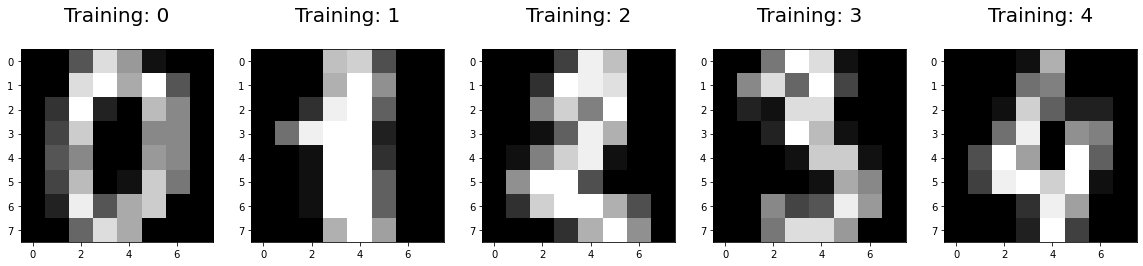

In [4]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index +1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [5]:
# Training and Testing

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(digits.data,digits.target, test_size=0.23, random_state=2)

In [6]:
print(x_train.shape)

(1383, 64)


In [7]:
print(y_train.shape)

(1383,)


In [8]:
print(x_test.shape)

(414, 64)


In [9]:
print(y_test.shape)

(414,)


In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

C:\Users\rissan.pattnaik\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
# Return a NumPy Array
# predict for one observation(image)

print(logisticRegr.predict(x_test[0].reshape(1,-1)))

[4]


In [13]:
logisticRegr.predict(x_test[0:3])

array([4, 0, 9])

In [14]:
logisticRegr.predict(x_test[0:10])

array([4, 0, 9, 1, 8, 7, 1, 5, 1, 6])

In [15]:
# Testing the entier datasets
predictions = logisticRegr.predict(x_test)
predictions

array([4, 0, 9, 1, 8, 7, 1, 5, 1, 6, 6, 7, 6, 1, 5, 5, 8, 6, 2, 7, 4, 6,
       4, 1, 5, 2, 9, 5, 4, 6, 5, 6, 3, 4, 0, 9, 9, 8, 4, 6, 8, 8, 5, 7,
       9, 8, 9, 6, 1, 7, 0, 1, 9, 7, 3, 3, 1, 8, 8, 8, 9, 8, 5, 8, 4, 8,
       3, 5, 8, 4, 3, 9, 3, 8, 7, 3, 3, 0, 8, 7, 2, 8, 5, 3, 8, 7, 6, 4,
       6, 2, 2, 0, 1, 1, 5, 3, 5, 7, 1, 8, 2, 2, 6, 4, 6, 7, 3, 7, 3, 9,
       4, 7, 0, 3, 5, 8, 5, 0, 3, 9, 2, 7, 3, 2, 0, 8, 1, 9, 2, 1, 5, 1,
       0, 3, 4, 3, 0, 8, 3, 2, 2, 7, 3, 1, 6, 7, 2, 8, 3, 1, 1, 6, 4, 8,
       2, 1, 8, 4, 1, 3, 1, 1, 9, 5, 4, 8, 7, 4, 8, 9, 5, 7, 6, 9, 4, 0,
       4, 0, 0, 9, 0, 6, 5, 8, 8, 3, 7, 9, 2, 0, 3, 2, 7, 3, 0, 2, 1, 5,
       2, 7, 0, 6, 9, 3, 3, 1, 3, 5, 2, 8, 5, 2, 1, 2, 9, 4, 6, 5, 5, 5,
       9, 7, 1, 5, 9, 6, 3, 7, 1, 7, 5, 1, 7, 2, 7, 5, 5, 4, 8, 6, 6, 2,
       8, 7, 3, 7, 8, 0, 3, 5, 7, 4, 3, 4, 1, 0, 3, 3, 5, 4, 1, 3, 1, 2,
       5, 1, 4, 0, 3, 1, 5, 5, 7, 4, 0, 1, 0, 9, 5, 5, 5, 4, 0, 1, 8, 6,
       2, 1, 1, 1, 7, 9, 6, 7, 9, 7, 0, 4, 9, 6, 9,

In [16]:
# To test how accuratelyit has performed

score = logisticRegr.score(x_test, y_test)
print(score)  # 95% Accurate

0.9516908212560387


In [17]:
# Using ConfusionMatrix getting the accuracy

cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[37  0  0  0  1  0  0  0  0  0]
 [ 0 45  0  1  0  0  0  0  1  1]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  0  0  1  1  0]
 [ 0  0  0  0 34  0  0  0  3  1]
 [ 0  1  0  0  1 44  0  0  0  0]
 [ 0  1  0  0  0  0 39  0  1  0]
 [ 0  0  0  0  0  0  0 45  1  0]
 [ 0  0  0  0  0  0  0  0 37  1]
 [ 0  0  0  2  0  1  0  0  1 30]]


Text(0.5, 1.0, 'Accuracy Score: 0.9516908212560387')

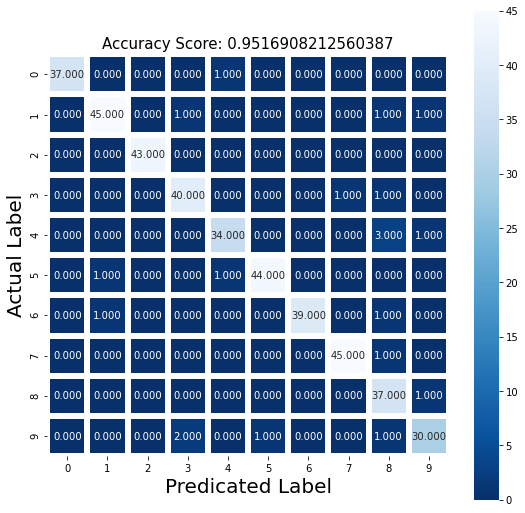

In [18]:
# Visualizing the Confusion Matrix in more sophisticated way usinh hip map

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths= 5, square= True, cmap= 'Blues_r')
plt.ylabel('Actual Label', size = 20)
plt.xlabel('Predicated Label', size = 20)
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

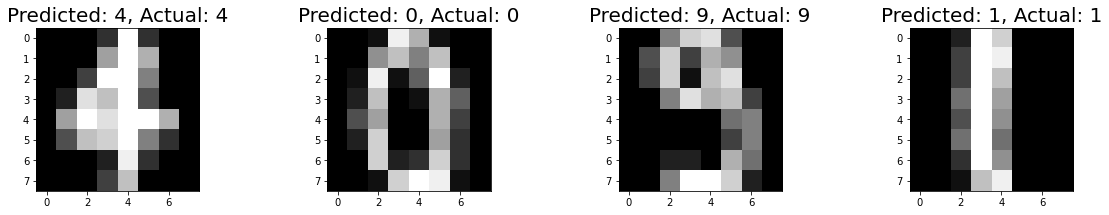

In [19]:
# Sample data ,How system has classified

index = 0
classifiedIndex = []
for predict, actual in zip(predictions, y_test):
    if predict==actual:
        classifiedIndex.append(index)
    index +=1
plt.figure(figsize=(20,3))
for plotIndex, wrong in enumerate(classifiedIndex[0:4]):
    plt.subplot(1,4, plotIndex +1)
    plt.imshow(np.reshape(x_test[wrong], (8,8)), cmap=plt.cm.gray)
    plt.title("Predicted: {}, Actual: {}" .format(predictions[wrong], y_test[wrong]), fontsize=20)